In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import (accuracy_score, f1_score, ConfusionMatrixDisplay, recall_score)

In [11]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [13]:
df["Sex"] = np.where(df["Sex"] == "male", 0, 1)
df["Sex"].unique()

array([0, 1])

In [14]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500


In [16]:
Y = df["Survived"]
X = df[["Pclass","Sex","Age"]]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion='gini',n_estimators=3,max_depth=3,min_samples_split=3,random_state=0)
RF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=3, min_samples_split=3, n_estimators=3,
                       random_state=0)

In [19]:
labels = ["Pclass","Sex","Age"]

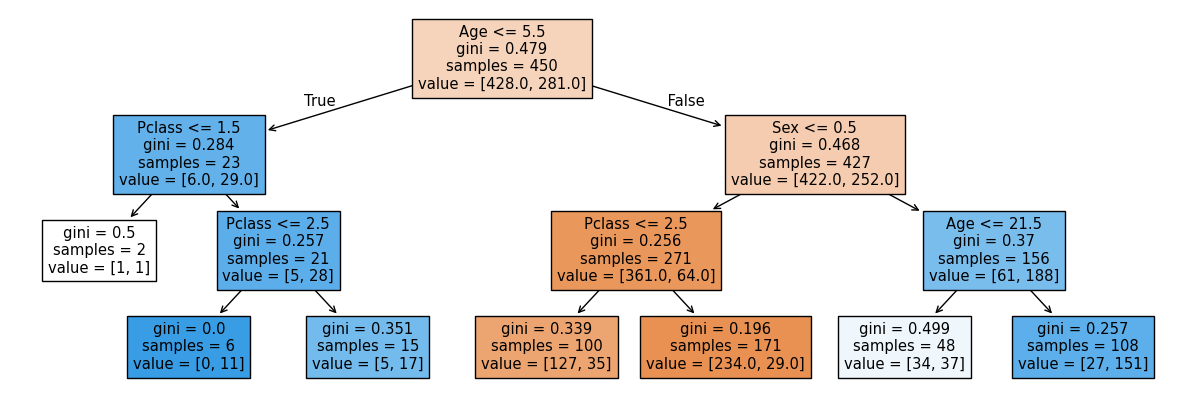

In [21]:
fig = plt.figure(figsize=(15,5))
tree.plot_tree(RF.estimators_[0],feature_names=labels,filled=True,impurity=True)
plt.show()

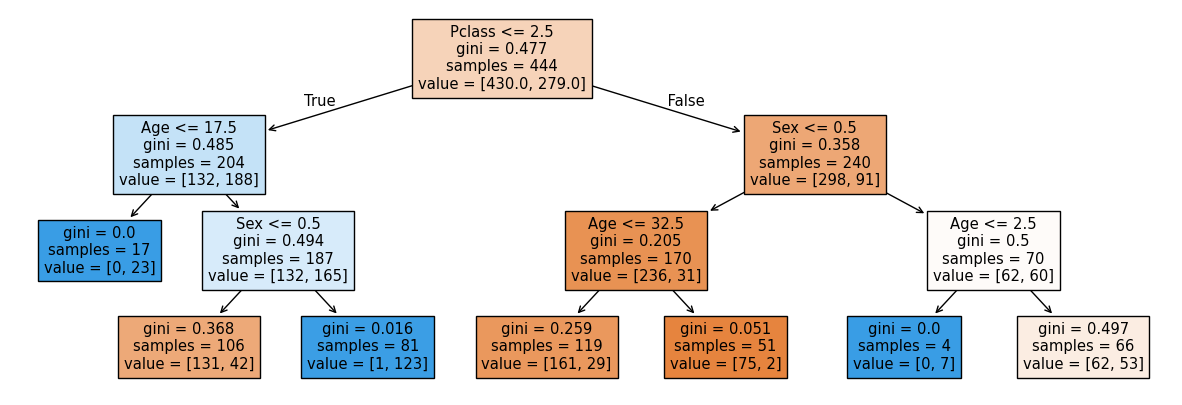

In [22]:
fig = plt.figure(figsize=(15,5))
tree.plot_tree(RF.estimators_[1],feature_names=labels,filled=True,impurity=True)
plt.show()

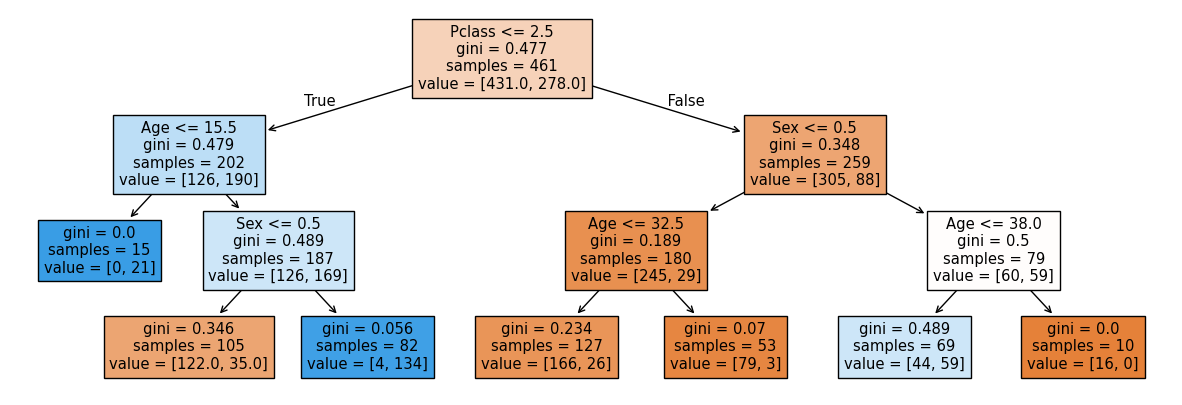

In [23]:
fig = plt.figure(figsize=(15,5))
tree.plot_tree(RF.estimators_[2],feature_names=labels,filled=True,impurity=True)
plt.show()

In [26]:
predctions = pd.DataFrame({"Pclass":[1],"Sex":[1],"Age":[28]})
print(RF.predict(predctions))

[1]


In [27]:
predctions = pd.DataFrame({"Pclass":[1],"Sex":[0],"Age":[28]})
print(RF.predict(predctions))

[0]


In [28]:
predctions = pd.DataFrame({"Pclass":[2],"Sex":[1],"Age":[28]})
print(RF.predict(predctions))

[1]


In [31]:
Y_test = pd.DataFrame(Y_test)
Y_test["Predicted"] = RF.predict(X_test[["Pclass","Sex","Age"]])
Y_test.head()

,Survived,Predicted
296,1,0
682,0,0
535,0,0
644,1,0
623,0,0


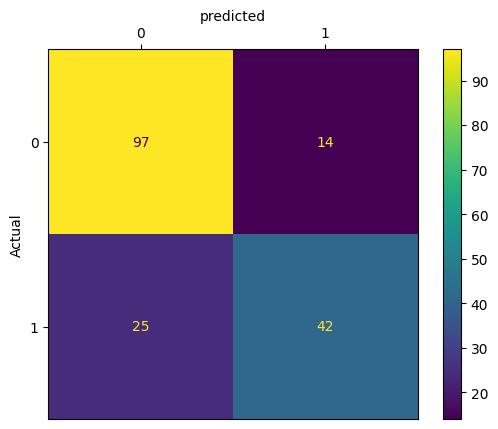

In [34]:
CMatrix = ConfusionMatrixDisplay.from_predictions(Y_test["Survived"],Y_test["Predicted"],labels = [0,1])
plt.xlabel("predicted")
plt.ylabel("Actual")
ax = CMatrix.ax_
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()

In [35]:
metrics.accuracy_score(Y_test["Survived"],Y_test["Predicted"])

0.7808988764044944

In [37]:
recall_score(Y_test["Survived"],Y_test["Predicted"], pos_label=1)

0.6268656716417911